# Geospatial Data Analysis I 

## Univariate Statistics - Solution  

### Exercise 1: Daten einlesen und prüfen

- Open the file "Data_GW_KA.xlsx" in Excel and have a look at the data. Which type of data (discrete / continuous, ratio / interval / closed /etc.) do the individual columns represent? Please note the types in the box below.  

- Read the file into your notebook using Pandas and save the groundwater temperature data into a separate array. 

Data Types in "Data_GW_KA.csv": 

- Name: nominal data
- Depth: continuous ratio data
- Dissolved oxygen: continuous ratio data
- Groundwater temperature: continuous interval data (or ratio) 
- Electric conductivity: continuous ratio data
- pH: continuous ratio data
- Iron: continuous ratio data
- Phosphate: continuous ratio data
- Nitrate: continuous ratio data
- Detritus: discrete ordinal data 
- Amount of sediment: discrete ordinal data 
- Geology: discrete ordinal data 
- Land use type: discrete ordinal data 
- Abundancy (i.e. number) of groundwater fauna species: continuous ratio data
- Abundancy (i.e. number) of groundwater fauna individuals: continuous ratio data
- Percentage of individual Crustaceens: continuous closed data
- Percentage of individual Oligochaets: continuous closed data

In [1]:
# [1]
# reading the csv file
import pandas as pd
data = pd.read_excel("Data_GW_KA.xlsx")

# saving groundwater temperature (column 4) into a separate array
GWT = data.iloc[:,3].values
type(GWT)

numpy.ndarray

Next, visualise the groundwater temperature data to get an overview on the range of measured values and potential outliers. Pick an appropriate plot type in matplotlib. 

Do not forget to add the basic figure elements (axes label, ticks and title). 

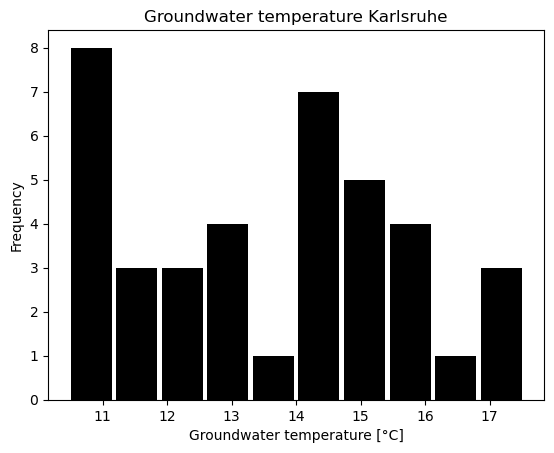

In [2]:
# [2] 
import matplotlib.pyplot as plt

plt.hist(GWT, rwidth = 0.9, color='k')
plt.xlabel("Groundwater temperature [°C]")
plt.ylabel("Frequency")
plt.title("Groundwater temperature Karlsruhe")

plt.show()


### Exercise 2: Measures for Central Tendency

Now you can calculate different measures for the central tendency for the groundwater temperature. These measures help to contextualize the measured values on a linear scale, and are typcially used to get an estimated value representative for the entire data set. A common measure for central tendency is the arithmetic mean.

- Calculate the arithmetic mean for the groundwater temperature as the `sum()` of all values divided by the number of values (e.g. `len()`): 

<img src="https://latex.codecogs.com/gif.latex?\bar{x}&space;=&space;\frac{1}{n}\sum_{i=1}^{n}x_{i}" title="\bar{x} = \frac{1}{n}\sum_{i=1}^{n}x_{i}" />


In [3]:
# [4] calulating the arithmetic mean 
n = len(GWT)
print(n)
amean = (1/n)*sum(GWT)
print(amean)

39
13.526666666666666


Of course there is a in-built function `mean()` in Python to calculate the arithmetic mean. In order to use it, you first need to import the package `statistics` into your script / your notebook, e.g. with `from statistics import mean`. 

- Now, calculate the mean groundwater temperature using the imported function.  

In [4]:
# [5] calculating the mean values using "mean()""
from statistics import mean
amean = mean(GWT)
print (amean)

13.526666666666667


The arithmetic mean however is very sensitive for outliers, i.e. extreme values that differ from the majority of the values. For this reason the median is often used as measure for central tendency in geoscience instead. The median is value that lies in the middle of the data set, meaning 50% of the values are larger, the other 50% are smaller. The equation for a calculating the median of a sorted data set is as follows:   

For an even number of values: 

<img src="https://latex.codecogs.com/gif.latex?\widetilde{x}&space;=&space;(x_{(n/2)}&plus;x_{(n/2)&plus;1})/2" title="\widetilde{x} = (x_{(n/2)}+x_{(n/2)+1})/2" /> 

For an uneven number of values: 

<img src="https://latex.codecogs.com/gif.latex?\widetilde{x}&space;=&space;x_{(n&plus;1)/2}" title="\widetilde{x} = x_{(n+1)/2}" />

- First, sort the values in the array in ascending order. 

- Then, calculate the median of the groundwater temperature, choosing the correct equation from above based on your `n`. Tipp: once you have calculated the index value, you need to transform it into an integer (`int`) in order tobe able to use it for indexing. 
 

In [5]:
# sorting the values of the groundwater temperature array
import numpy as np
GWT_sorted=np.sort(GWT)

# calculatin the median 
Median=GWT_sorted[int((n+1)/2)]
print(Median)

14.13


Now, use the `median` function in the `statistics` package to calculate the median again, and compare both values. What could be the reason for the deviation? 

In [6]:
# [8] median with statistics package 
import statistics
Median2 = statistics.median(GWT)
print(Median2)

14.0


Another common measure for central tendency is the mode value. Is it reasonable to calculate the mode value for the groundwater temperature, and why or why not?

Pick a suitable parameter for a mode value in the excel file, and use to method `statistics.mode()` to calculate it. 

In [ ]:
# [9] picking a suitable parameter 
# --> every parameter with discrete numeric value, i.e. detritus, sediment, geology or land use. 
geology = data.iloc[:,11]
mode = statistics.mode(geology)
print (mode)



14.4


Back to groundwater temperature: you can now also calculate the three quartile values (at 0.25, 0.5, 0.75) with the method `np.quantile(GWT, [0.25, 0.5, 0.75])`.
The middle quartile (0.5) should correspond to the median value from above. 

In [8]:
# [10] calculating quartiles
quart = np.quantile(GWT, [0.25, 0.5, 0.75])
print(quart)

[11.465 14.    14.95 ]


### Exercise 3: Measures for Statistical Dispersion 

Measures for statistica dispersion help to get a feeling for the spatial or temporal variation of the data. The simplest measure for disperion is the range, i.e. teh difference between the smallest and largest value. 

-  Use  `min()` und `max()` to calculate the range of the groundwater temperature.  

In [9]:
# [11]
range = max(GWT)-min(GWT)
print(range)

7.0600000000000005


As the range is calculated using the extreme values, it is very sensitive to outliers and in most geoscientiffic application not a robust measure for dispersion. One more robust measures is for example the interquartile range (IQR), i.e. the middle 50% of the data points. 

- Use the quartiles from above to calculate the IQR (Q3 - Q1) of the groundwater temperature.   

In [10]:
# [12] interquartile range
IQR = quart[2]-quart[0]
print(IQR)

3.4849999999999994


The most commonly used measures for statistical dispersion are the standard deviation (sigma) and the disperion (sigma^2). 

The standard deviation of the samples is the square root of the mean value of the differences between each value and the mean value: 

<img src="https://latex.codecogs.com/gif.latex?s&space;=&space;\sqrt{\frac{1}{n-1}\sum_{i=1}^{n}&space;(x_{i}-{\bar{x}})^{2}}" title="s = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n} (x_{i}-{\bar{x}})^{2}}" />

The variance is simply the square of the standard deviation: 

<img src="https://latex.codecogs.com/gif.latex?s^{2}&space;=&space;\frac{1}{n-1}\sum_{i=1}^{n}&space;(x_{i}-{\bar{x}})^{2}" title="s^{2} = \frac{1}{n-1}\sum_{i=1}^{n} (x_{i}-{\bar{x}})^{2}" />

The `statistics`package in Python contains methods from both standard devations of samples (`statistics.stdev()`) and the entire (estimated) population (`statistics.pstdev()`). 

- Use the corresponding functions to calculate standard deviation and variance (`statistics.variance()`) of the sampled groundwater temperatures. 

- Also, compare them to the values of the range and IQR above. 


In [11]:
# [13]
stabw = statistics.stdev(GWT)
print(stabw)
var = statistics.variance(GWT)
print(var)

2.107264794059043
4.440564912280702


### Exercise 4: Measures for Skewness and Kurtosis

Now, we can also calculate the skewness and kurtosis of the data. For the skewness there are two commonly used equations: 

Pearson's Mode Skewness: 

<img src="https://latex.codecogs.com/gif.latex?skewness&space;=&space;(mean-mode)/standarddeviation" title="skewness = (mean-mode)/standarddeviation" />

Fisher Skewness: 

<img src="https://latex.codecogs.com/gif.latex?skewness&space;=&space;\sum_{i=1}^{n}\frac{(x_{i}-\bar{x})^{3}}{s^{3}}" title="skewness = \sum_{i=1}^{n}\frac{(x_{i}-\bar{x})^{3}}{s^{3}}" />

- Calculate the Pearson Skewness 

- Calcualte the Fisher Skewness, using a `for` loop to calculate the difference from the mean for each value. 

- Then, compare both values. 

In [12]:
# [14] Pearson Skewness
Pearson = (amean - statistics.mode(GWT))/stabw
print (Pearson)

# Fisher Skewness
Fisher = 0
for i in range(n):
    Fisher += (GWT[i]-amean)**3/stabw**3

print(Fisher)

-0.4144392939109973


TypeError: 'numpy.float64' object is not callable

The fourth statistical measure is the kurtosis, which describes the  difference in "peakyness" of the distribution relative to a normal distribution. It can be calculated similarly to the Fisher Skewness: 

<img src="https://latex.codecogs.com/gif.latex?kurtosis&space;=&space;\sum_{i=1}^{n}\frac{(x_{i}-\bar{x})^{4}}{s^{4}}" title="kurtosis = \sum_{i=1}^{n}\frac{(x_{i}-\bar{x})^{4}}{s^{4}}" />

- Copy your code for the Fisher Skewness from above and adapt it for calculating the kurtosis. 

- Is the distribution of groundwater temperature values more or less "peaky" than a normal distribution? 


In [ ]:
# [16]
Kurtosis = 0
for i in range(n):
    Kurtosis += (GWT[i]-amean)**4/stabw**4
print(Kurtosis)

# kurtosis >> 0, so more peaky than a normal distribution. 

Now you have calculated all four statistical measures for the groundwater temperature. If there is time left, you can explore other parameters. Using `scipy.stats.describe()` you can get almost all descriptive measures in one go ;)


## END